Importing libraries that will be used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
def load_dataset():
    train_dataset = h5py.File('./NN/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) 
    train_y = np.array(train_dataset["train_set_y"][:])
   
    test_dataset = h5py.File('./NN/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) 
    test_y = np.array(test_dataset["test_set_y"][:])
    classes = np.array(test_dataset["list_classes"][:]) 
  
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes

In [3]:
train_x, train_y, test_x, test_y, classes = load_dataset()

In [4]:
print(f"Train X shape: {train_x.shape}")
print(f"Train Y shape: {train_y.shape}", end="\n\n")
print(f"Test X shape: {test_x.shape}")
print(f"Test Y shape: {test_y.shape}")
print(f"Classes: {classes[0]}, {classes[1]}")

Train X shape: (209, 64, 64, 3)
Train Y shape: (1, 209)

Test X shape: (50, 64, 64, 3)
Test Y shape: (1, 50)
Classes: b'non-cat', b'cat'


TypeError: Invalid shape (50,) for image data

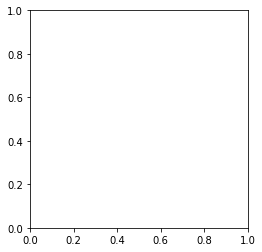

In [70]:
plt.imshow(train_x[2])

In [38]:
train_x = train_x.reshape(train_x.shape[0], -1).T
train_x = test_x.reshape(test_x.shape[0], -1).T

print ("Train X shape: " + str(train_x.shape))
print ("Train Y shape: " + str(train_y.shape))
print ("Test X shape: " + str(train_x.shape))
print ("Test Y shape: " + str(test_y.shape))

Train X shape: (12288, 50)
Train Y shape: (1, 209)
Test X shape: (12288, 50)
Test Y shape: (1, 50)


In [37]:
train_x = train_x/255.
test_x = test_x/255.

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [9]:
def initialize_parameters(dim):
    w = np.random.randn(dim, 1)*0.01
    b = 0
    return w, b

In [63]:
def propagate(w, b, X, Y):
    m = X.shape[1]

    #calculate activation function
    A = sigmoid(np.dot(w.T, X)+b)
    #find the cost
    print("multiplication")
    print(A.shape, Y.shape)
    mult1 = Y * np.log(A) 
    mult2 = (1 - Y) * (np.log(1 - A))
    
    print("sum")
    sums = np.sum(mult)
    
    print("cost")
    cost = (-1/m) * sums  
    
    #find gradient (back propagation)
    dw = (1/m) * np.dot(X, (A-Y).T)
    db = (1/m) * np.sum(A-Y)
    cost = np.squeeze(cost)
    grads = {"dw": dw,
             "db": db} 
    return grads, cost

In [64]:
def gradient_descent(w, b, X, Y, iterations, learning_rate):
    costs = []
    for i in range(iterations):
        grads, cost = propagate(w, b, X, Y)
        
        #update parameters
        w = w - learning_rate * grads["dw"]
        b = b - learning_rate * grads["db"]
        costs.append(cost)
        if i % 500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}  
    
    return params, costs

In [65]:
w, b = initialize_parameters(train_x.shape[0])


In [66]:
def model(train_x, train_y, test_x, test_y, iterations, learning_rate):
    w, b = initialize_parameters(train_x.shape[0])
    parameters, costs = gradient_descent(w, b, train_x, train_y, iterations, learning_rate)
    
    w = parameters["w"]
    b = parameters["b"]
    
    # predict 
    test_pred_y = predict(w, b, test_x)
    train_pred_y = predict(w, b, train_x)
    print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
    print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    
    return costs

In [67]:
iterations = 2000
learning_rate = 0.005
w, b = initialize_parameters(train_x.shape[0])

In [68]:
parameters, costs = gradient_descent(w, b, train_x, train_y, iterations, learning_rate)

multiplication
(1, 50) (1, 209)


ValueError: operands could not be broadcast together with shapes (1,209) (1,50) 

In [30]:
print(f"w.shape = {w.shape}\nb.shape = {b}\ntrain_x.shape = {train_x.shape}\niteratoins = {iterations}\nlearning rate = {learning_rate}")

w.shape = (12288, 1)
b.shape = 0
train_x.shape = (12288, 50)
iteratoins = 2000
learning rate = 0.005


In [ ]:
w = parameters["w"]
b = parameters["b"]

# predict 
test_pred_y = predict(w, b, test_x)
train_pred_y = predict(w, b, train_x)
print("Train Acc: {} %".format(100 - np.mean(np.abs(train_pred_y - train_y)) * 100))
print("Test Acc: {} %".format(100 - np.mean(np.abs(test_pred_y - test_y)) * 100))
    